In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv("usa_hospital_beds.csv",engine='python')
df.head(2)

,X,Y,ID,HOSPITAL_NAME,HOSPITAL_TYPE,ADDRESS,CITY,STATE,ZIP_CODE,COUNTY_NAME,STATE_NAME,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,-112.066157,33.495498,1,Phoenix VA Health Care System (AKA Carl T Hayd...,VA Hospital,650 E Indian School Rd,Phoenix,AZ,85012,Maricopa,Arizona,62.0,62.0,0,0,NaN,0,0.0
1,-110.965885,32.181263,2,Southern Arizona VA Health Care System,VA Hospital,3601 S 6th Ave,Tucson,AZ,85723,Pima,Arizona,NaN,NaN,2,2,NaN,0,2.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6626 entries, 0 to 6625
Data columns (total 18 columns):
X                                  6609 non-null float64
Y                                  6609 non-null float64
ID                                 6626 non-null int64
HOSPITAL_NAME                      6626 non-null object
HOSPITAL_TYPE                      6626 non-null object
ADDRESS                            6626 non-null object
CITY                               6626 non-null object
STATE                              6626 non-null object
ZIP_CODE                           6626 non-null int64
COUNTY_NAME                        6602 non-null object
STATE_NAME                         6602 non-null object
NUM_LICENSED_BEDS                  6403 non-null float64
NUM_STAFFED_BEDS                   6328 non-null float64
NUM_ICU_BEDS                       6626 non-null int64
ADULT_ICU_BEDS                     6626 non-null int64
BED_UTILIZATION                    5917 non-null floa

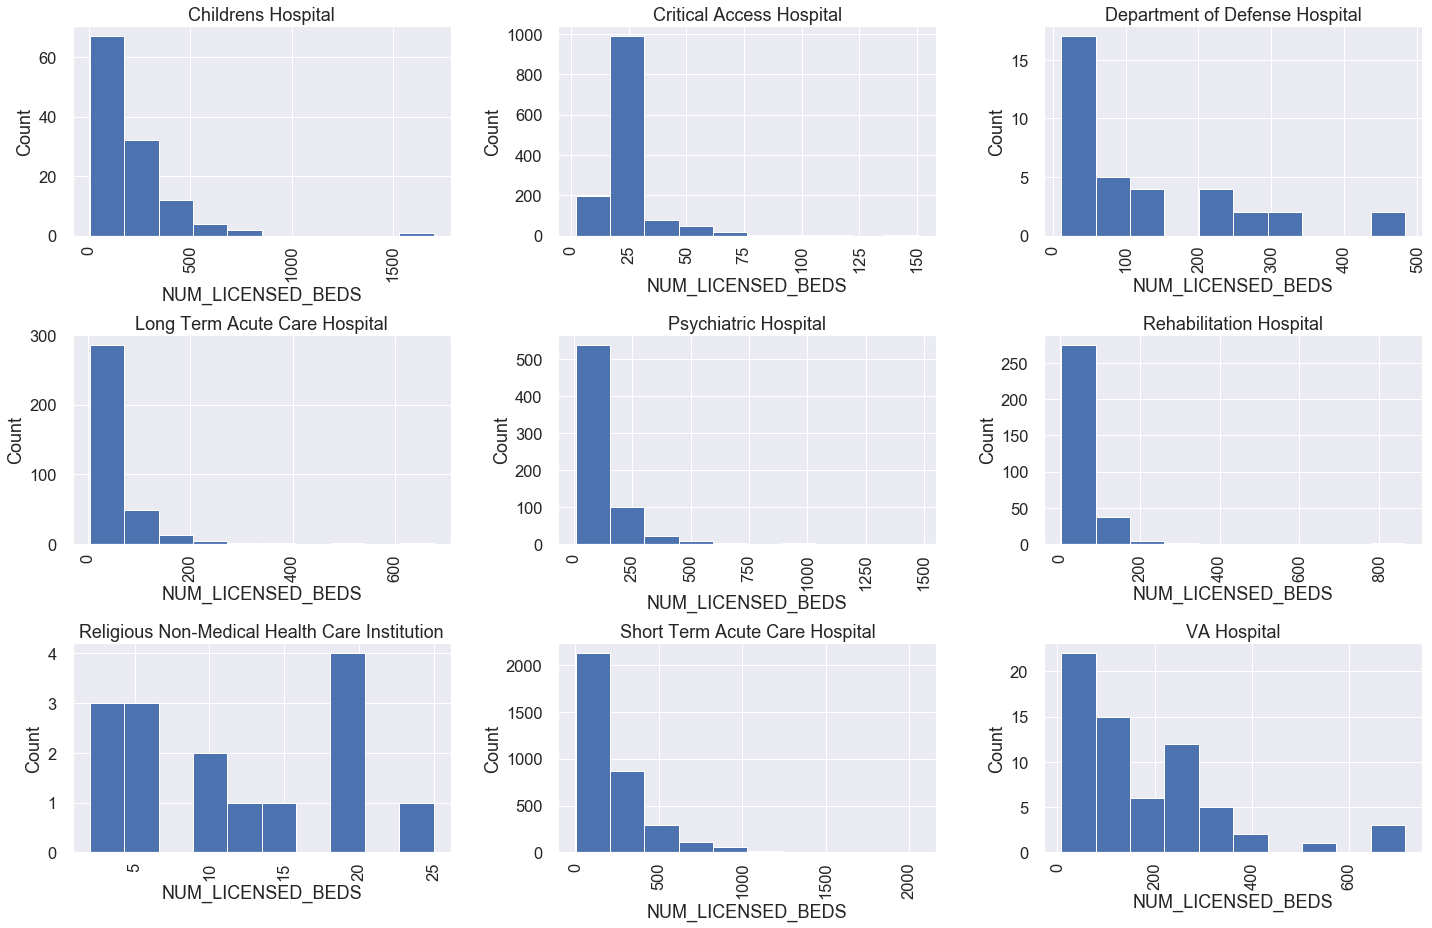

In [67]:
#Distribution Plot for NUM_LICENSED_BEDS
col = 'NUM_LICENSED_BEDS'
ylabel = "Count"
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,13))

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

ax[0][0].set_ylabel(ylabel)
ax[0][1].set_ylabel(ylabel)
ax[0][2].set_ylabel(ylabel)
ax[1][0].set_ylabel(ylabel)
ax[1][1].set_ylabel(ylabel)
ax[1][2].set_ylabel(ylabel)
ax[2][0].set_ylabel(ylabel)
ax[2][1].set_ylabel(ylabel)
ax[2][2].set_ylabel(ylabel)

plt.tight_layout()

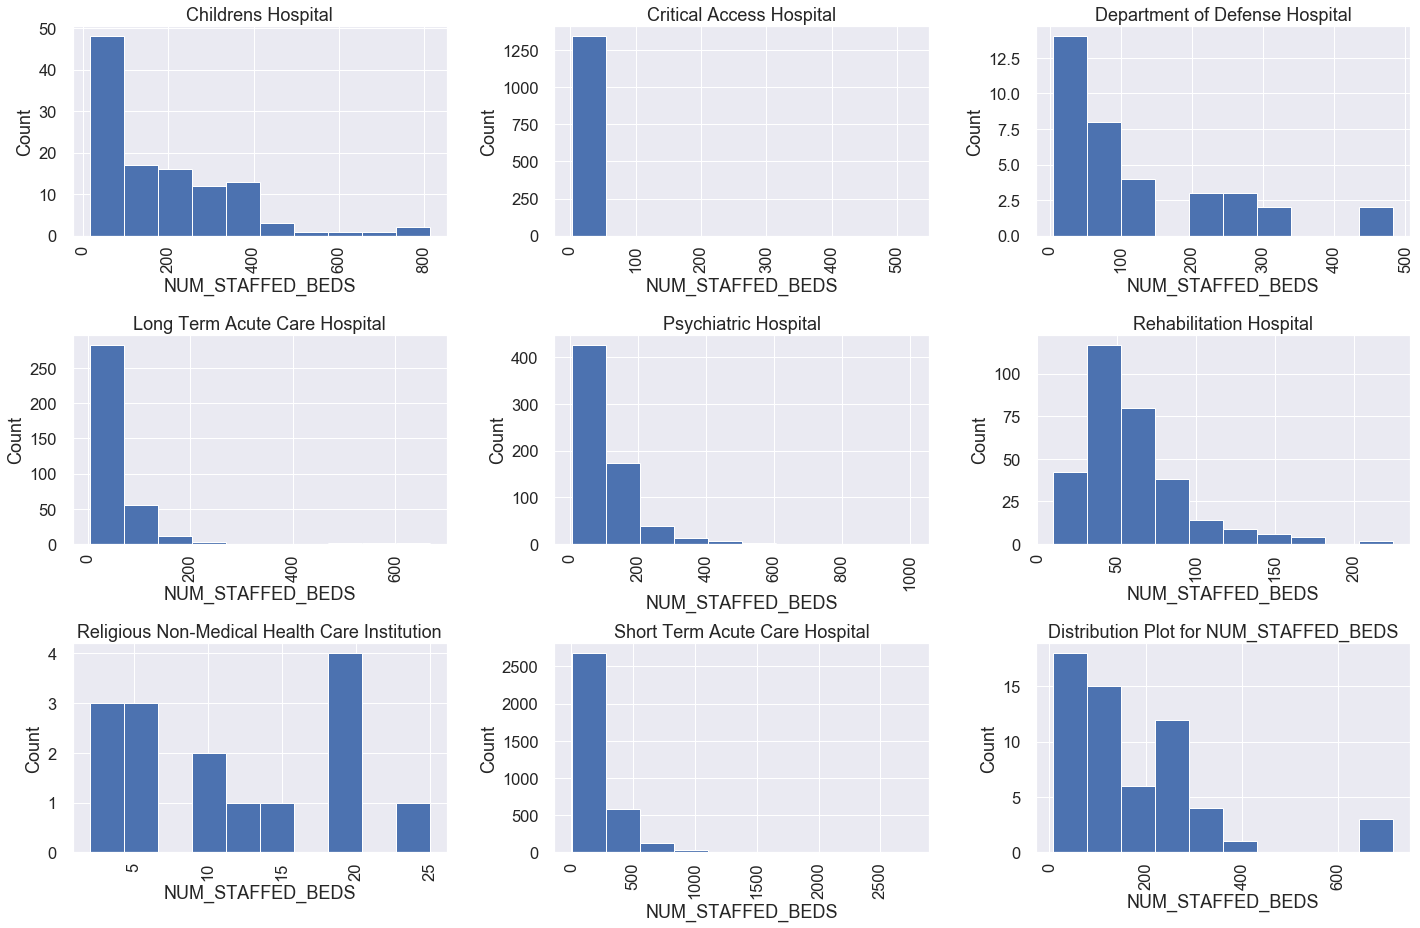

In [68]:
#Distribution Plot for NUM_STAFFED_BEDS
col = 'NUM_STAFFED_BEDS'
ylabel = "Count"
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,13))

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

ax[0][0].set_ylabel(ylabel)
ax[0][1].set_ylabel(ylabel)
ax[0][2].set_ylabel(ylabel)
ax[1][0].set_ylabel(ylabel)
ax[1][1].set_ylabel(ylabel)
ax[1][2].set_ylabel(ylabel)
ax[2][0].set_ylabel(ylabel)
ax[2][1].set_ylabel(ylabel)
ax[2][2].set_ylabel(ylabel)

plt.title("Distribution Plot for NUM_STAFFED_BEDS")
plt.tight_layout()

In [69]:
group = df.groupby(['HOSPITAL_TYPE'])
group['NUM_LICENSED_BEDS'].describe()

,count,mean,std,min,25%,50%,75%,max
HOSPITAL_TYPE,,,,,,,,
Childrens Hospital,118.0,201.372881,223.423472,4.0,48.25,130.0,297.75,1700.0
Critical Access Hospital,1344.0,25.440476,12.281243,2.0,21.00,25.0,25.00,151.0
Department of Defense Hospital,36.0,122.555556,122.673188,12.0,40.50,60.0,203.75,483.0
Long Term Acute Care Hospital,357.0,62.428571,68.374330,4.0,33.00,44.0,63.00,675.0
Psychiatric Hospital,675.0,114.620741,128.261283,8.0,46.00,84.0,137.00,1479.0
Rehabilitation Hospital,319.0,62.670846,56.866346,4.0,40.00,50.0,73.50,864.0
Religious Non-Medical Health Care Institution,15.0,11.733333,7.676185,2.0,5.50,10.0,20.00,25.0
Short Term Acute Care Hospital,3473.0,217.099626,206.750910,1.0,70.00,154.0,300.00,2059.0
VA Hospital,66.0,182.212121,162.633284,8.0,66.25,137.5,250.75,715.0


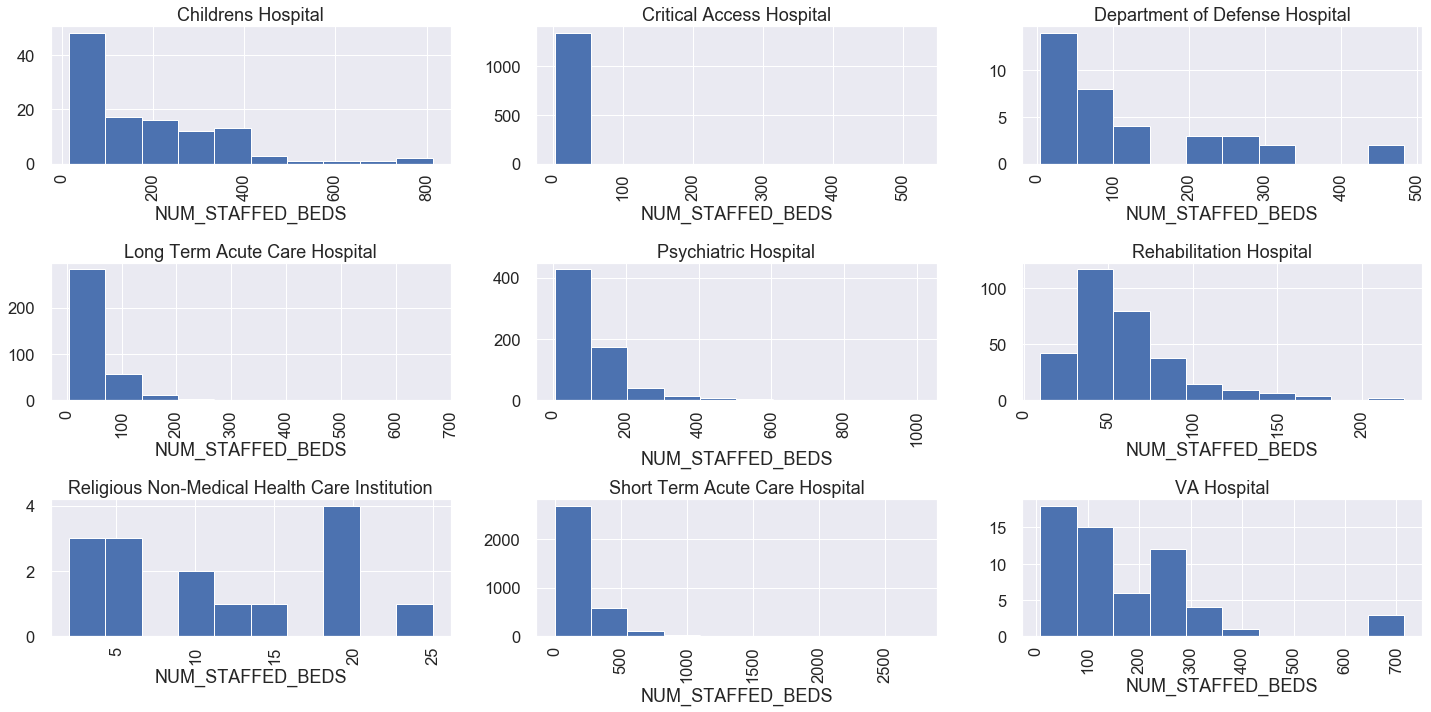

In [70]:
col = 'NUM_STAFFED_BEDS'
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,10))

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

plt.tight_layout()
# group = df.groupby(['HOSPITAL_TYPE'])
# group['NUM_STAFFED_BEDS'].describe()

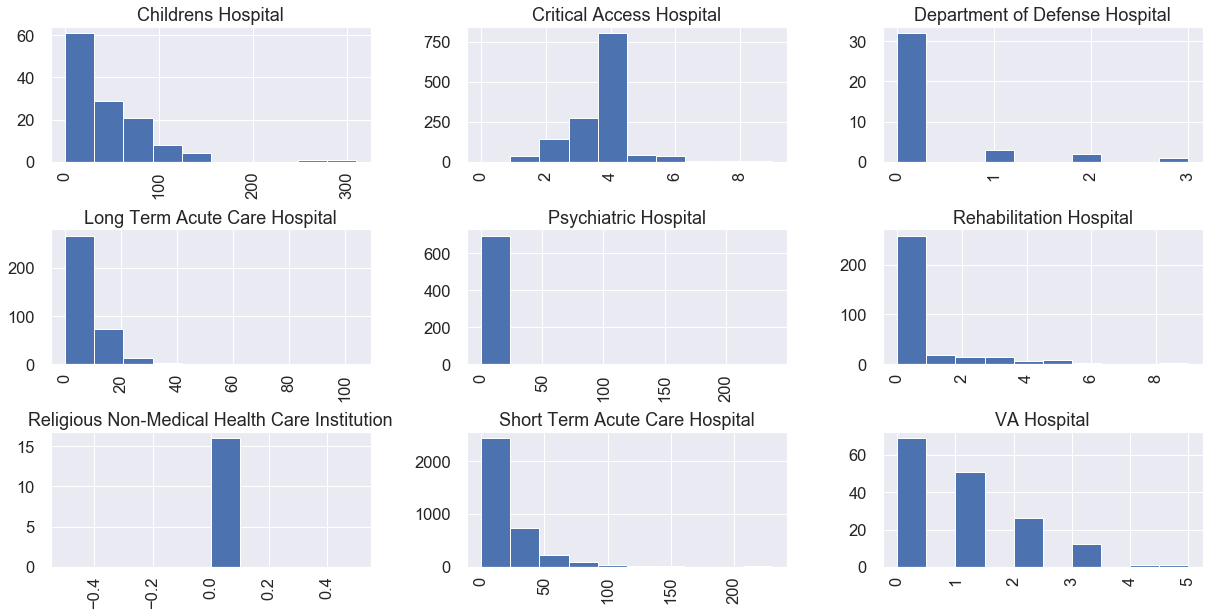

In [71]:
df.hist(by='HOSPITAL_TYPE',column='NUM_ICU_BEDS',figsize=(20,10))
plt.show()

# group = df.groupby(['HOSPITAL_TYPE'])
# group['NUM_ICU_BEDS'].describe()

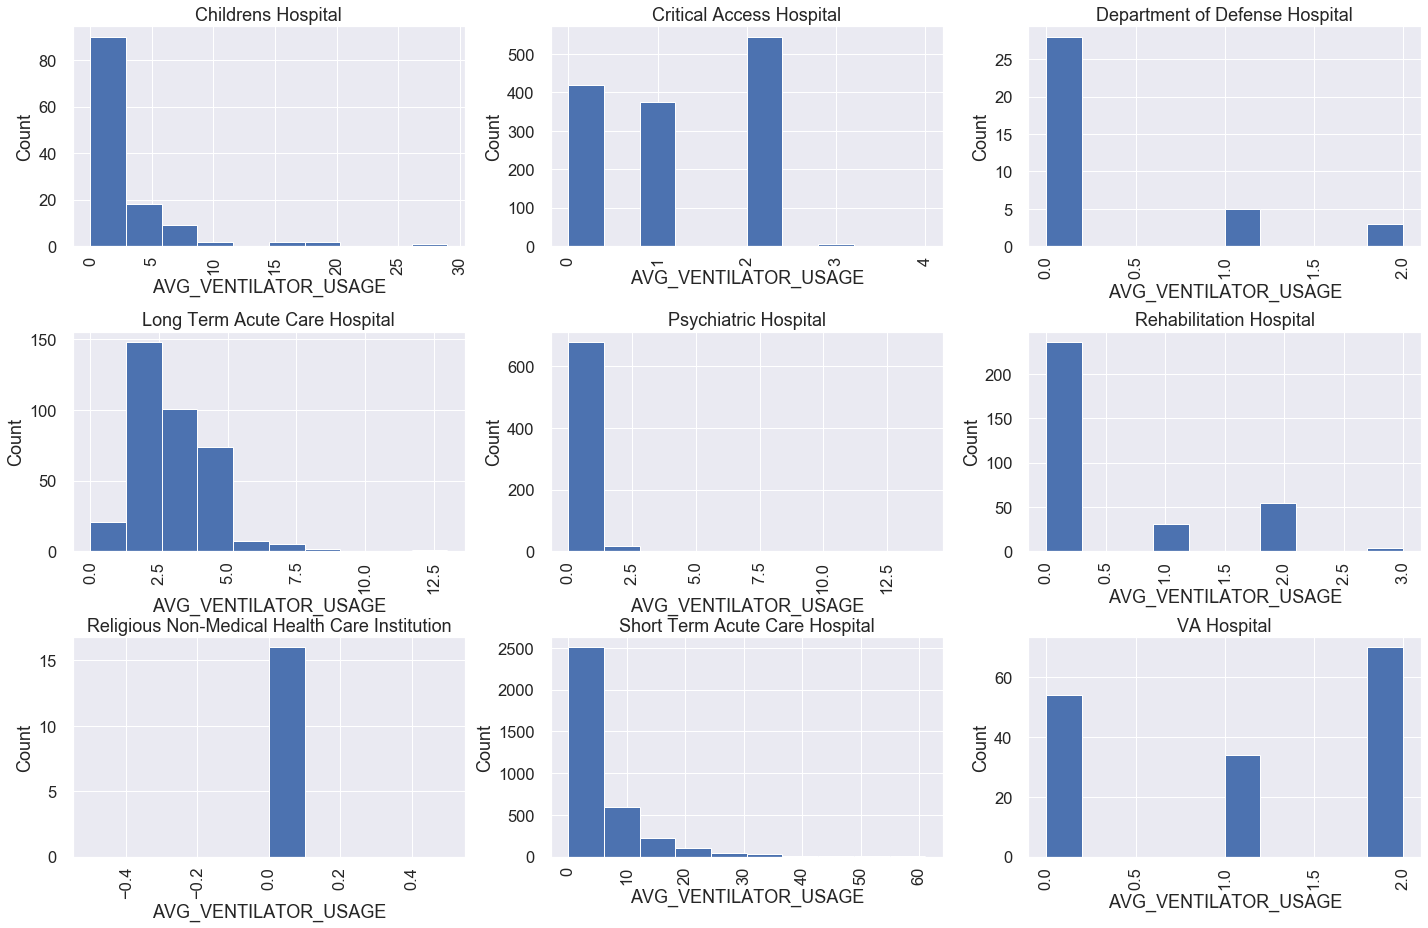

In [72]:
#Distribution Plot for AVG_VENTILATOR_USAGE
col = 'AVG_VENTILATOR_USAGE'
ylabel = "Count"
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,13))
plt.tight_layout()

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

ax[0][0].set_ylabel(ylabel)
ax[0][1].set_ylabel(ylabel)
ax[0][2].set_ylabel(ylabel)
ax[1][0].set_ylabel(ylabel)
ax[1][1].set_ylabel(ylabel)
ax[1][2].set_ylabel(ylabel)
ax[2][0].set_ylabel(ylabel)
ax[2][1].set_ylabel(ylabel)
ax[2][2].set_ylabel(ylabel)
plt.tight_layout()
# group = df.groupby(['HOSPITAL_TYPE'])
# group['ADULT_ICU_BEDS'].describe()

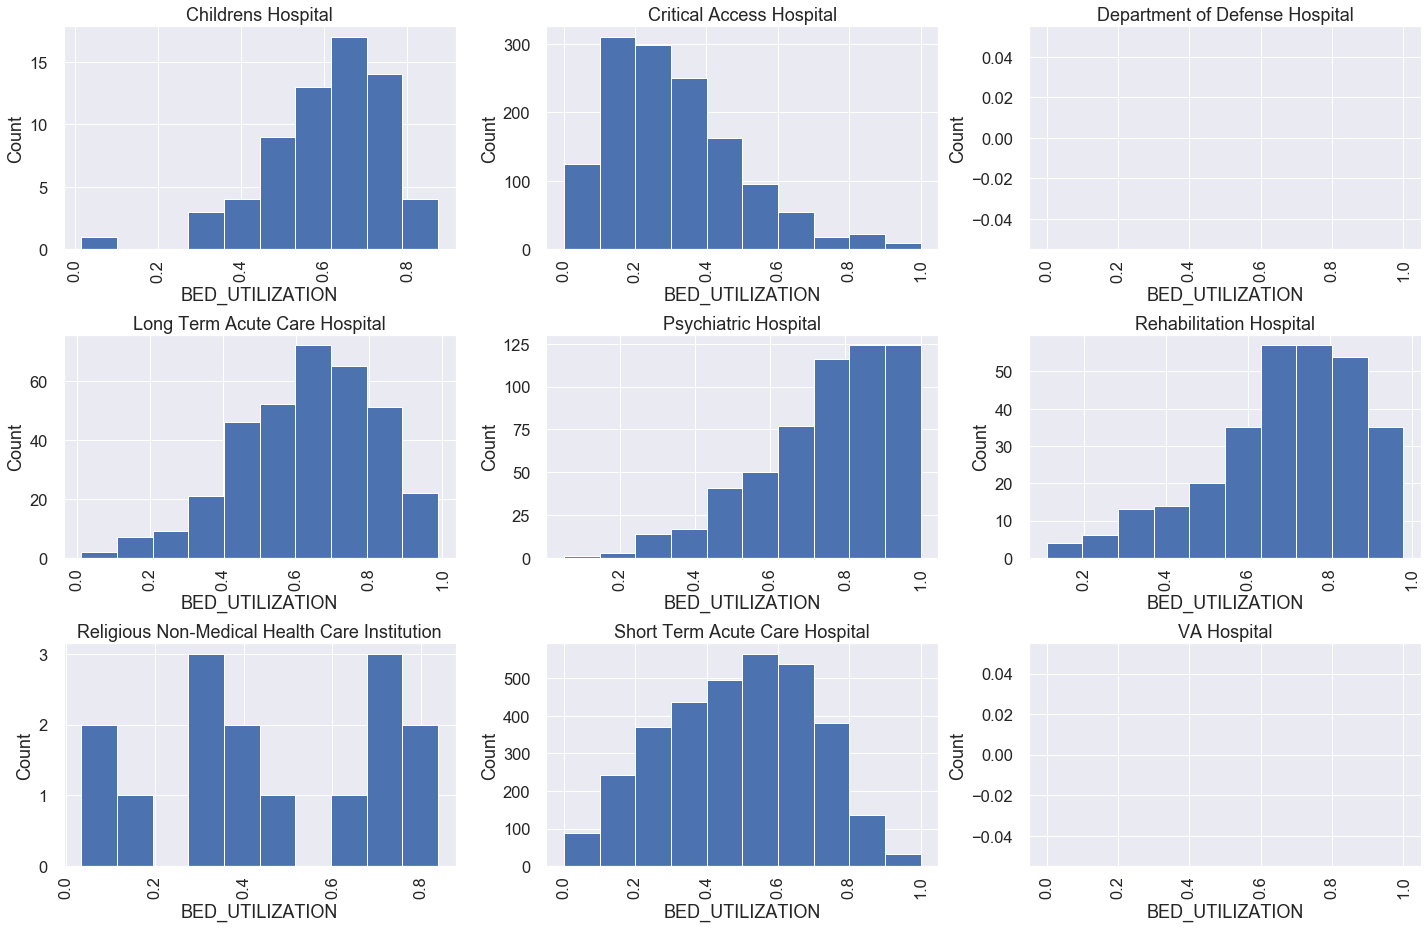

In [73]:
#Distribution Plot for BED_UTILIZATION
col = 'BED_UTILIZATION'
ylabel = "Count"
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,13))
plt.tight_layout()

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

ax[0][0].set_ylabel(ylabel)
ax[0][1].set_ylabel(ylabel)
ax[0][2].set_ylabel(ylabel)
ax[1][0].set_ylabel(ylabel)
ax[1][1].set_ylabel(ylabel)
ax[1][2].set_ylabel(ylabel)
ax[2][0].set_ylabel(ylabel)
ax[2][1].set_ylabel(ylabel)
ax[2][2].set_ylabel(ylabel)
plt.tight_layout()

In [74]:
df.isna().sum()[df.isna().sum()>0]

X                        17
Y                        17
COUNTY_NAME              24
STATE_NAME               24
NUM_LICENSED_BEDS       223
NUM_STAFFED_BEDS        298
BED_UTILIZATION         709
AVG_VENTILATOR_USAGE     59
dtype: int64

In [75]:
df['NUM_LICENSED_BEDS'].fillna(0,inplace=True)
df['NUM_STAFFED_BEDS'].fillna(0,inplace=True)
df['BED_UTILIZATION'].fillna(0,inplace=True)
df['AVG_VENTILATOR_USAGE'].fillna(0,inplace=True)
df.isna().sum()

X                                  17
Y                                  17
ID                                  0
HOSPITAL_NAME                       0
HOSPITAL_TYPE                       0
ADDRESS                             0
CITY                                0
STATE                               0
ZIP_CODE                            0
COUNTY_NAME                        24
STATE_NAME                         24
NUM_LICENSED_BEDS                   0
NUM_STAFFED_BEDS                    0
NUM_ICU_BEDS                        0
ADULT_ICU_BEDS                      0
BED_UTILIZATION                     0
Potential_Increase_In_Bed_Capac     0
AVG_VENTILATOR_USAGE                0
dtype: int64

In [76]:
data = df[['NUM_LICENSED_BEDS','NUM_STAFFED_BEDS','NUM_ICU_BEDS','ADULT_ICU_BEDS','BED_UTILIZATION','Potential_Increase_In_Bed_Capac','AVG_VENTILATOR_USAGE']].copy()

In [77]:
data.head()

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE
0,62.0,62.0,0,0,0.0,0,0.0
1,0.0,0.0,2,2,0.0,0,2.0
2,0.0,0.0,2,2,0.0,0,2.0
3,216.0,216.0,1,1,0.0,0,2.0
4,0.0,0.0,0,0,0.0,0,1.0


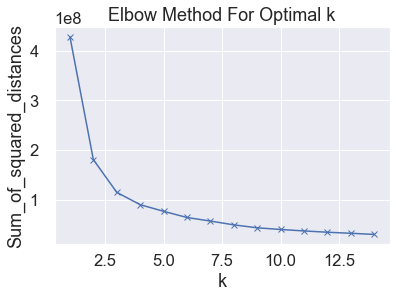

In [78]:
Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

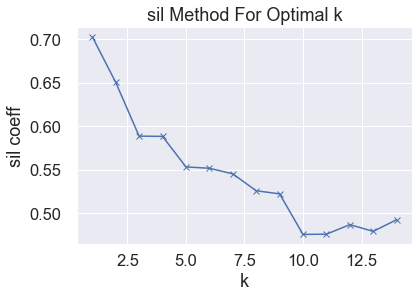

In [79]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data)
  labels = kmeans.labels_
  sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil coeff')
plt.title('sil Method For Optimal k')
plt.show

### k=3

### Fitting K-Means for k=3

In [80]:
model1 = KMeans(n_clusters = 3)
model1.fit(data)
pred1 = model1.predict(data)

In [81]:
model1_frame = data.copy()
model1_frame['cluster'] = pred1
model1_frame['cluster'].value_counts()

0    4941
1    1386
2     299
Name: cluster, dtype: int64

### Pairplot for model 1

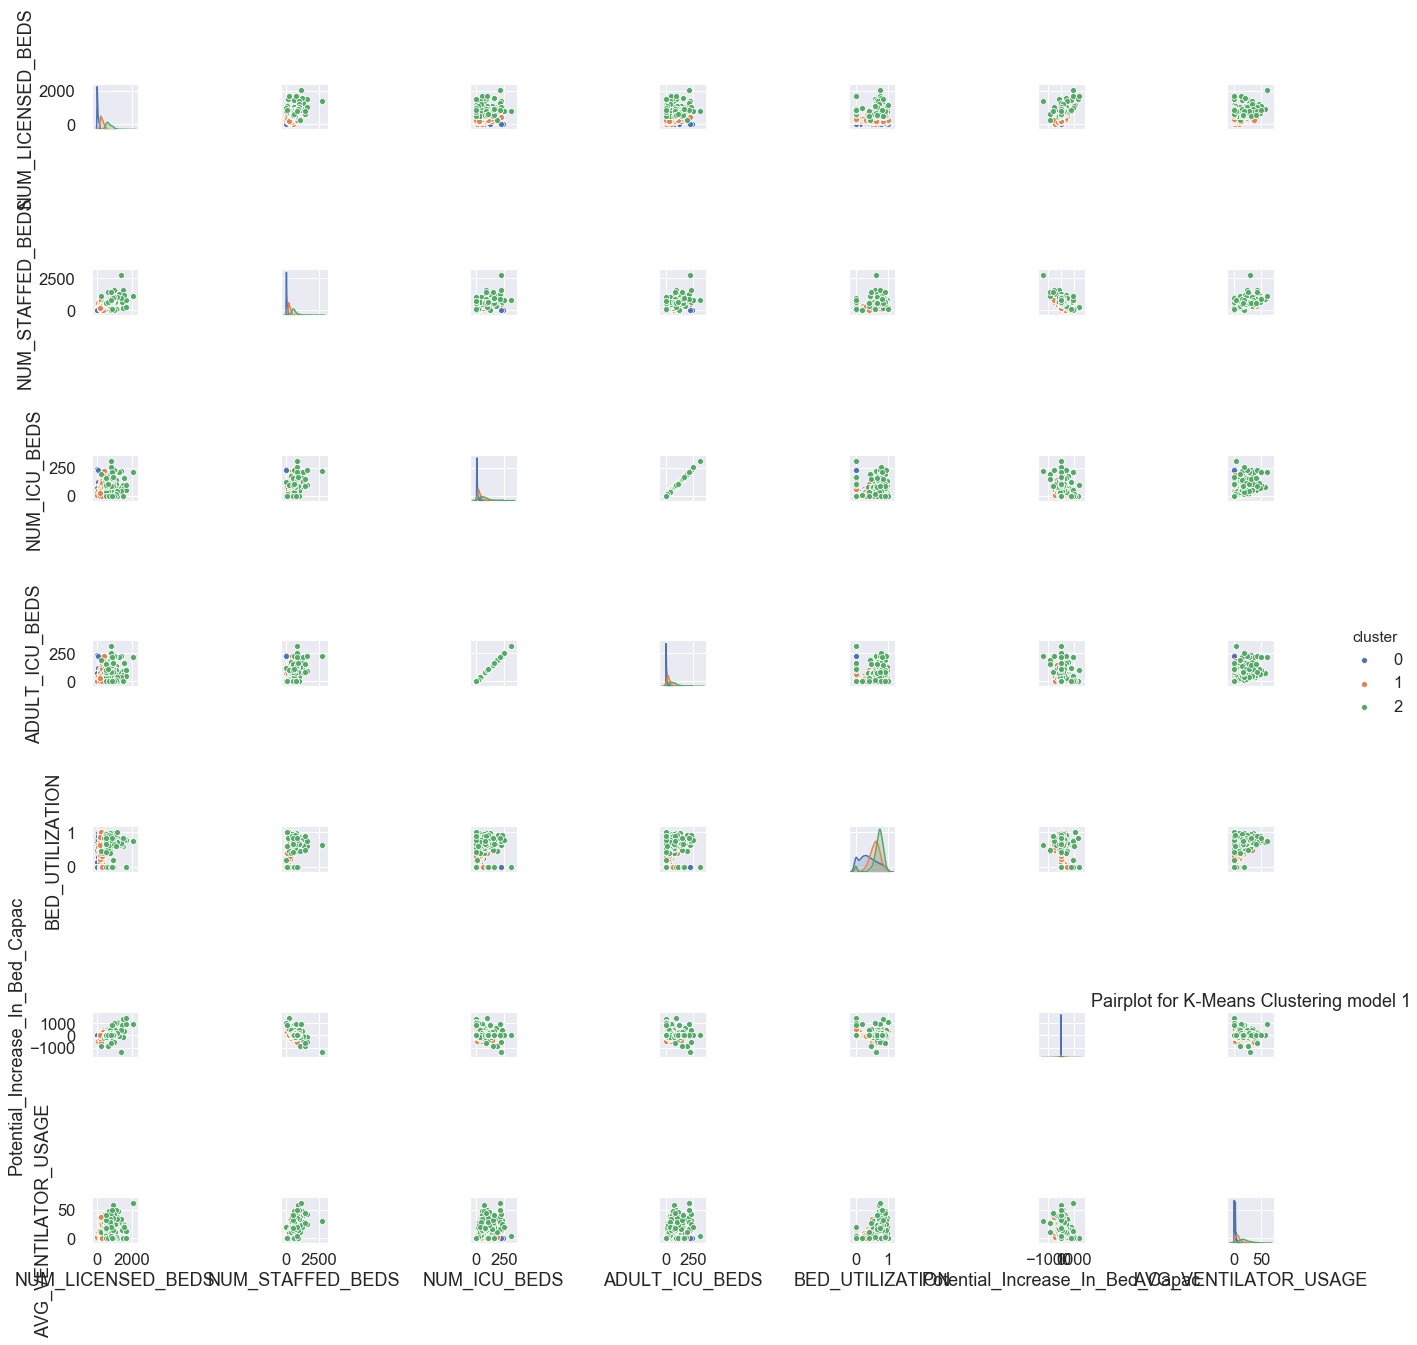

In [82]:
sns.pairplot(model1_frame,hue='cluster')
plt.title("Pairplot for K-Means Clustering model 1")
plt.show()

In [83]:
# df.hist(by='cluster',column='NUM_LICENSED_BEDS',figsize=(20,10))
# plt.show()
model1_frame.head(3)

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,cluster
0,62.0,62.0,0,0,0.0,0,0.0,0
1,0.0,0.0,2,2,0.0,0,2.0,0
2,0.0,0.0,2,2,0.0,0,2.0,0


### Cluster Distribution for Model 1

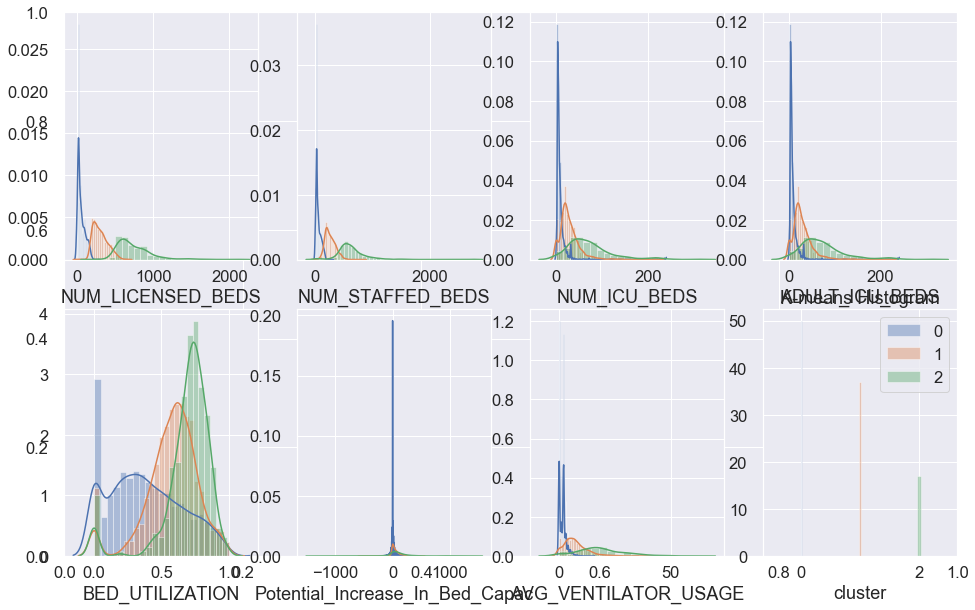

In [117]:
fig, ax = plt.subplots(figsize = (16, 10))
for i, col in enumerate(model1_frame.columns):
    for j in model1_frame.cluster.unique():
        ax=fig.add_subplot(2,4,i+1)
        sns.distplot(model1_frame[col].loc[model1_frame.cluster==j],label=j, ax=ax)


plt.title('K-means Histogram')
plt.legend();
#plt.tight_layout()

### Normalizing The Variables

<function matplotlib.pyplot.show(*args, **kw)>

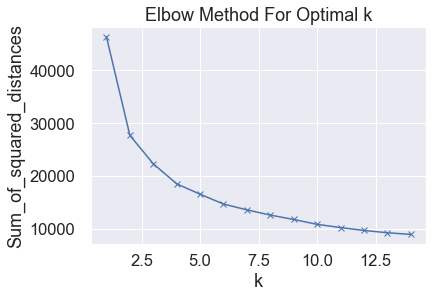

In [85]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data)
data_transformed = ss.transform(data)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show

### Taking k=4

In [86]:
model2 = KMeans(n_clusters = 4)
model2.fit(data_transformed)
pred2 = model2.predict(data_transformed)

model2_frame = pd.DataFrame(data_transformed,columns=data.columns)
model2_frame['cluster'] = pred2
model2_frame['cluster'].value_counts()

1    2885
2    2389
3    1118
0     234
Name: cluster, dtype: int64

#### Pairplot for model 2 i.e. transformed using standard scalar

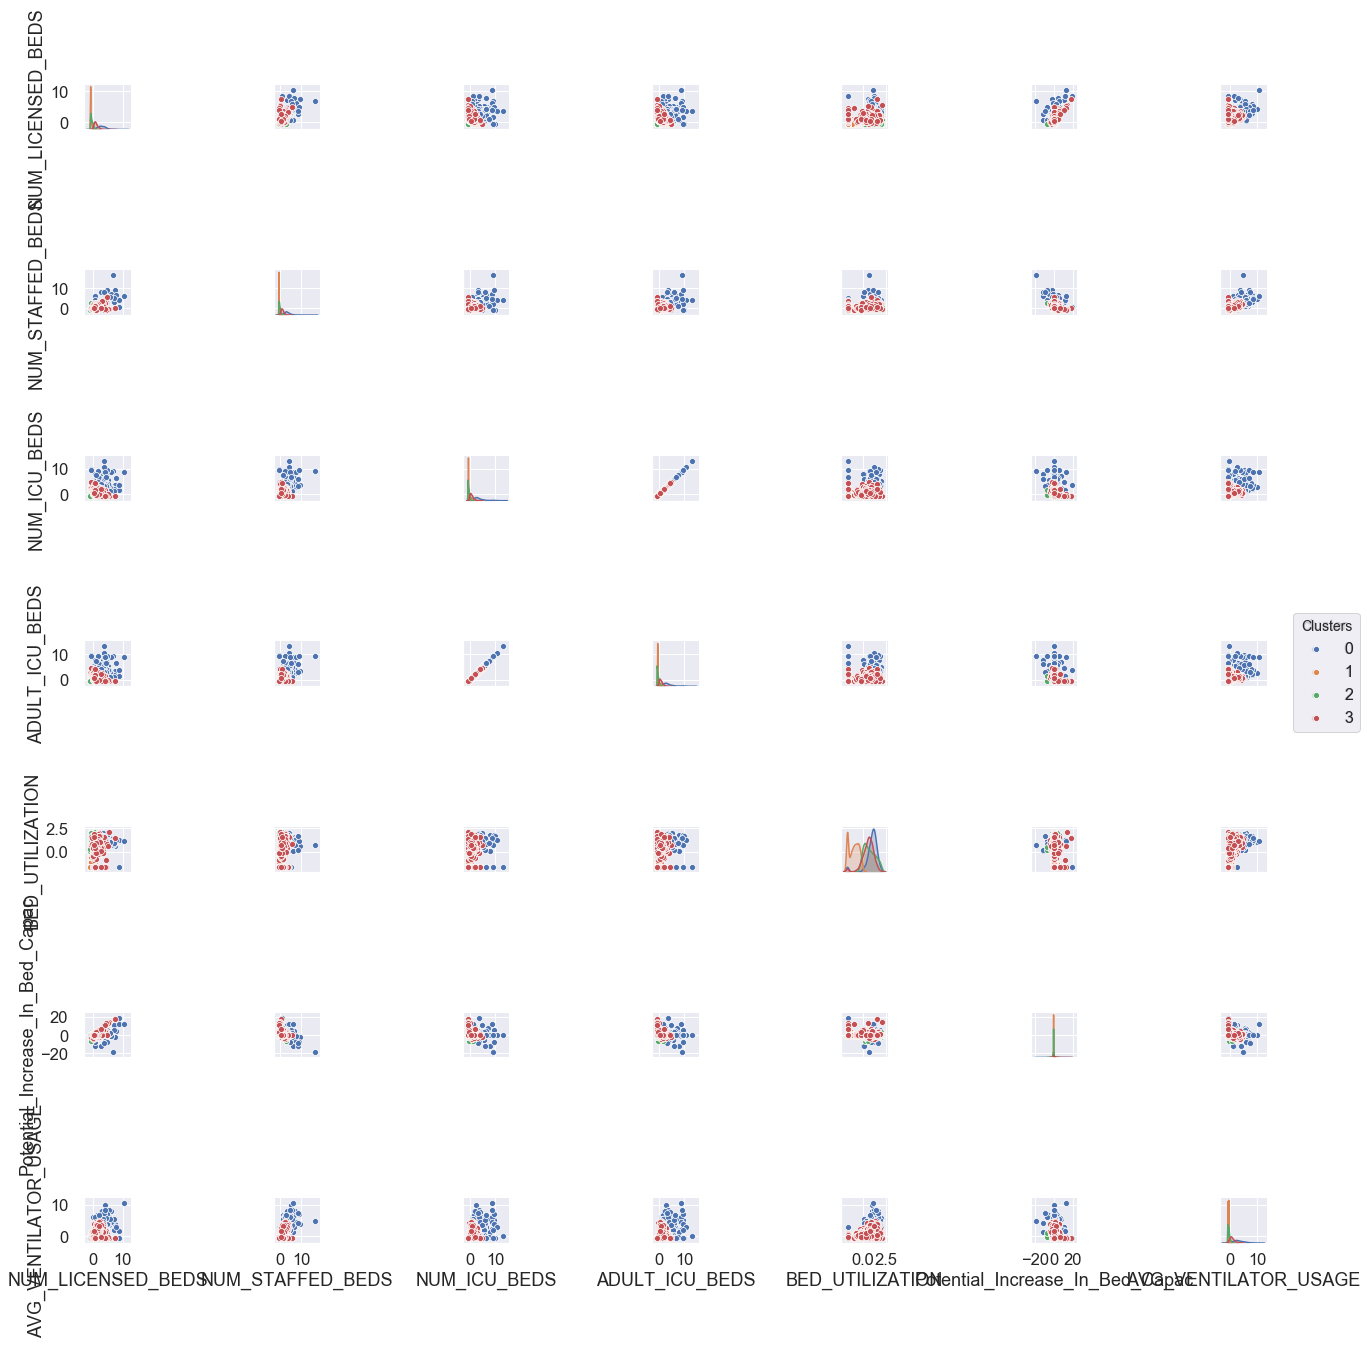

In [87]:
pairplot =sns.pairplot(model2_frame,hue='cluster')
handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()
pairplot.fig.legend(handles=handles, labels=labels, loc='center right', ncol=1,fontsize=16,
                    title="Clusters",title_fontsize=14)
sns.set(font_scale=1.5)
plt.show()
pairplot.savefig("pairplot.png")

1. Perfect Positive Correlation: 
    - Num ICU vs Adult ICU
    - 

2. Strong Positive Correlation:
    - Num Licence vs Num staffef with cluster1 more scattered than others
    - Num Licence vs Potential Increase in bed capacity
    - 
3. Low Positive Correlation
    - Num Licence vs ICU 
    - Num Licence vs Adult ICU
    - Num Licence vs Avg Ventilator usage
    - Num Staffed vs ICU 
    - Num Staffed vs Adult ICU
    - Num Staffed vs Avg Ventilator usage

4. No Correlation
    - Num Licence vs Bed utilization
    
5. Low Negative Correlation
    - Num Staffed vs Potential Increase in bed capacity
    - 

#### CLuster distribution for model 2

In [88]:
%matplotlib inline

In [89]:
handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()

In [90]:
model2_frame

,NUM_LICENSED_BEDS,NUM_STAFFED_BEDS,NUM_ICU_BEDS,ADULT_ICU_BEDS,BED_UTILIZATION,Potential_Increase_In_Bed_Capac,AVG_VENTILATOR_USAGE,cluster
0,-0.446739,-0.377649,-0.624318,-0.624318,-1.630433,-0.286146,-0.645601,1
1,-0.788251,-0.768365,-0.535256,-0.535256,-1.630433,-0.286146,-0.278617,1
2,-0.788251,-0.768365,-0.535256,-0.535256,-1.630433,-0.286146,-0.278617,1
3,0.401534,0.592837,-0.579787,-0.579787,-1.630433,-0.286146,-0.278617,1
4,-0.788251,-0.768365,-0.624318,-0.624318,-1.630433,-0.286146,-0.462109,1
...,...,...,...,...,...,...,...,...
6621,-0.788251,-0.768365,-0.624318,-0.624318,-1.630433,-0.286146,-0.645601,1
6622,-0.788251,-0.768365,-0.624318,-0.624318,-1.630433,-0.286146,-0.645601,1
6623,-0.788251,-0.768365,-0.624318,-0.624318,-1.630433,-0.286146,-0.645601,1
6624,-0.788251,-0.768365,-0.624318,-0.624318,-1.630433,-0.286146,-0.645601,1


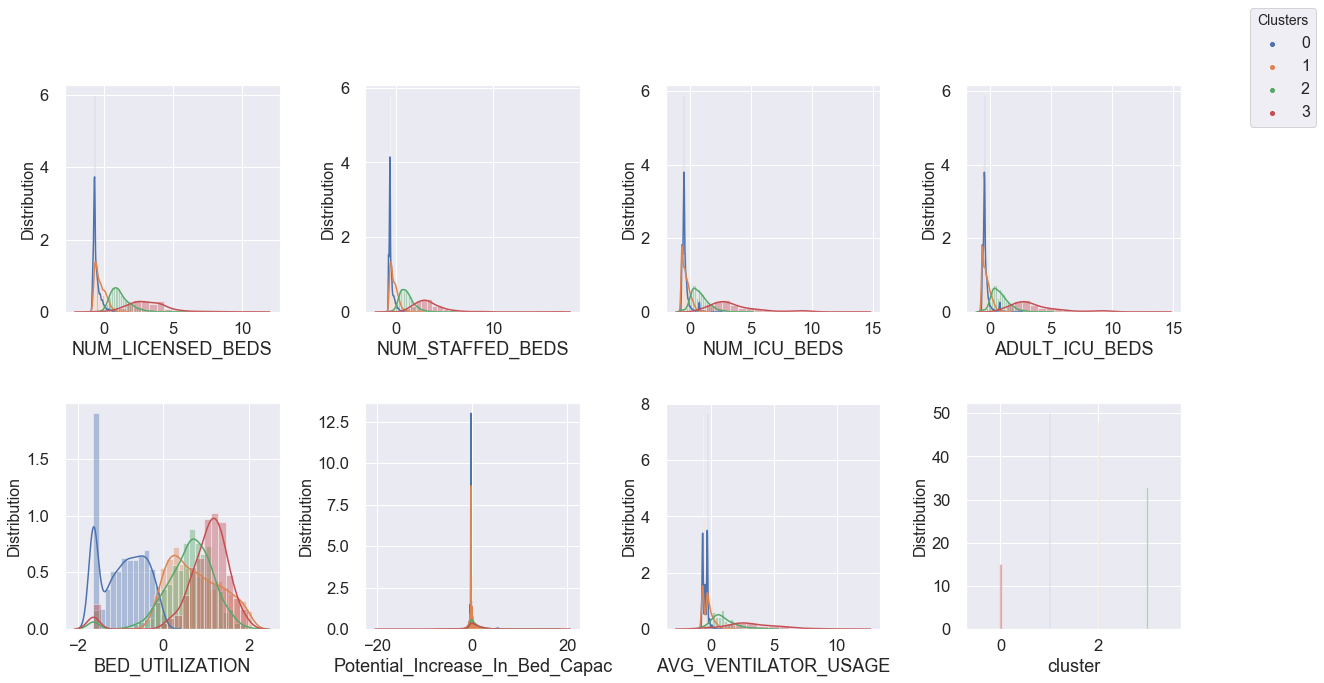

In [148]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(model2_frame.columns):
    for j in model2_frame.cluster.unique():
        ax=fig.add_subplot(2,4,i+1)
       # plt.rcParams['ytick.major.pad'] = 10
        sns.distplot(model2_frame[col].loc[model2_frame.cluster==j],label=j, ax=ax)
        plt.ylabel('Distribution', fontsize=16)
       
        
    
handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()
fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1,fontsize=16,
                    title="Clusters",title_fontsize=14)
# plt.title('Cluster Distribution')
#plt.tight_layout()

plt.savefig("cluster_distribution.png")

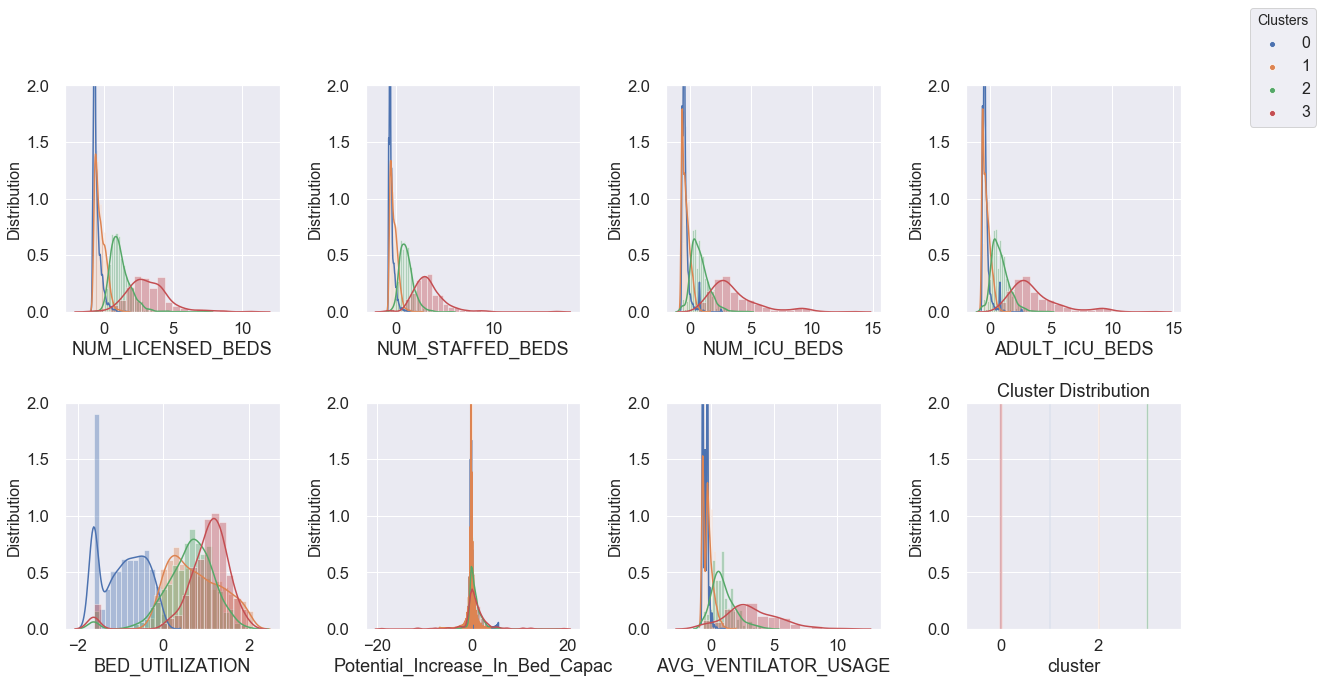

In [147]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(model2_frame.columns):
    for j in model2_frame.cluster.unique():
        ax=fig.add_subplot(2,4,i+1)
        ax.set(ylim=(0, 2))
        sns.distplot(model2_frame[col].loc[model2_frame.cluster==j],label=j, ax=ax)
        plt.ylabel('Distribution', fontsize=16)
        
      
        
handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()
fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1,fontsize=16,
                    title="Clusters",title_fontsize=14)

plt.title('Cluster Distribution')
# plt.legend(loc='upper center', ncol=1)
#plt.tight_layout()
plt.savefig("cluster_distribution_zoom.png")

1. Licensed Beds: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
2. Staffed Beds: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
3. ICU Beds: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
4. Adult_ICU:Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
5. Bed Utilization: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
6. Avg Ventilaton Usage: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed

1. Cluster 1 and 3 look normally distributed whereas 0 and 2 looke right skewed.
2. Overlapping: All the clusters have overlapping areas with other clusters.
3. 1 and 3 have least overlapping areas
4. Clusters 0 and 2 have large overlapping areas
5. Bed Utilization Feature has 2 with most distinct area then rest of the 3 clusters as they show large overlapping area



## Part 2 for Question 4

In [93]:
data2 = data = df[['HOSPITAL_TYPE','NUM_LICENSED_BEDS','NUM_STAFFED_BEDS','NUM_ICU_BEDS','ADULT_ICU_BEDS','BED_UTILIZATION','Potential_Increase_In_Bed_Capac','AVG_VENTILATOR_USAGE']].copy()

In [94]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [95]:
data2['HOSPITAL_TYPE'] = le.fit_transform(data2['HOSPITAL_TYPE']) 
  
data2['HOSPITAL_TYPE'].unique() 

array([8, 7, 1, 0, 3, 4, 5, 6, 2], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

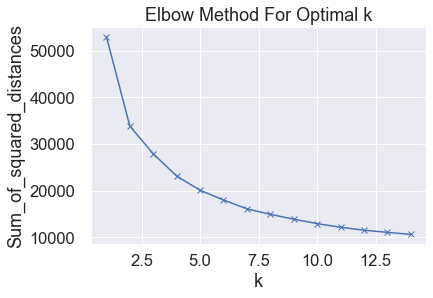

In [96]:
# from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(data2)
data_transformed = ss.transform(data2)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

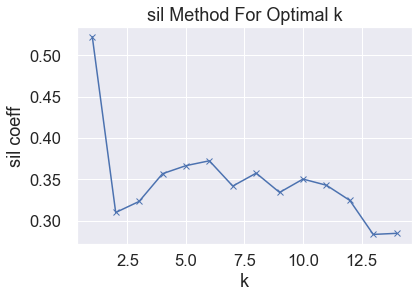

In [97]:
sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(data_transformed)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_transformed, labels, metric = 'euclidean'))

plt.plot(K, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('sil coeff')
plt.title('sil Method For Optimal k')
plt.show

### Taking k=6

In [98]:
model3 = KMeans(n_clusters = 6)
model3.fit(data_transformed)
pred3 = model3.predict(data_transformed)

In [99]:
model3_frame = pd.DataFrame(data_transformed,columns=data.columns)
model3_frame['cluster'] = pred3
model3_frame['cluster'].value_counts()

0    1912
4    1599
3    1315
2    1273
1     445
5      82
Name: cluster, dtype: int64

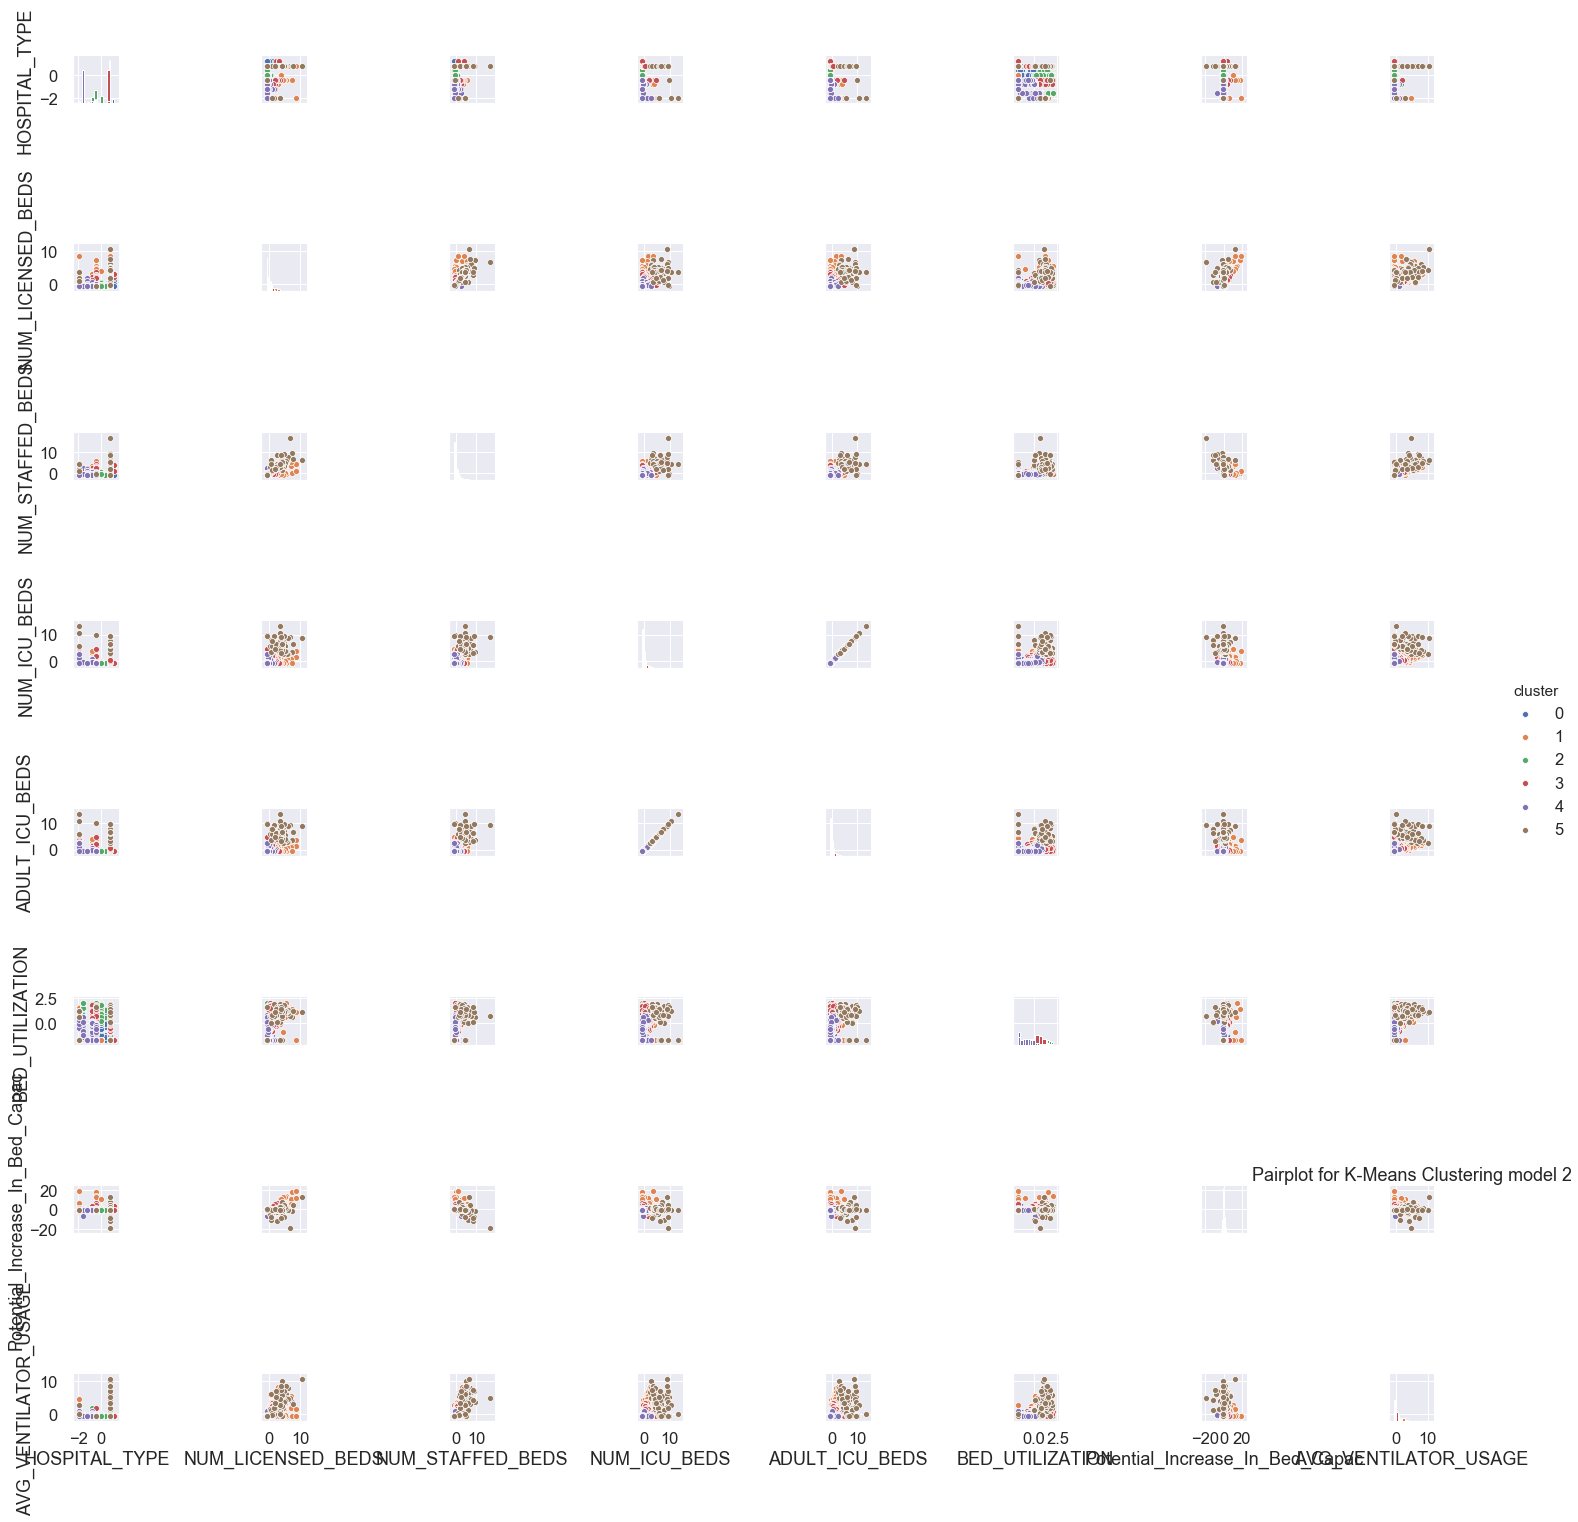

In [100]:
pairplot_model3 =sns.pairplot(model3_frame,hue='cluster',diag_kind='hist')
plt.title("Pairplot for K-Means Clustering model 2")
plt.show()
pairplot_model3.savefig("pairplot_model3.png")

### CLuster distribution for model3

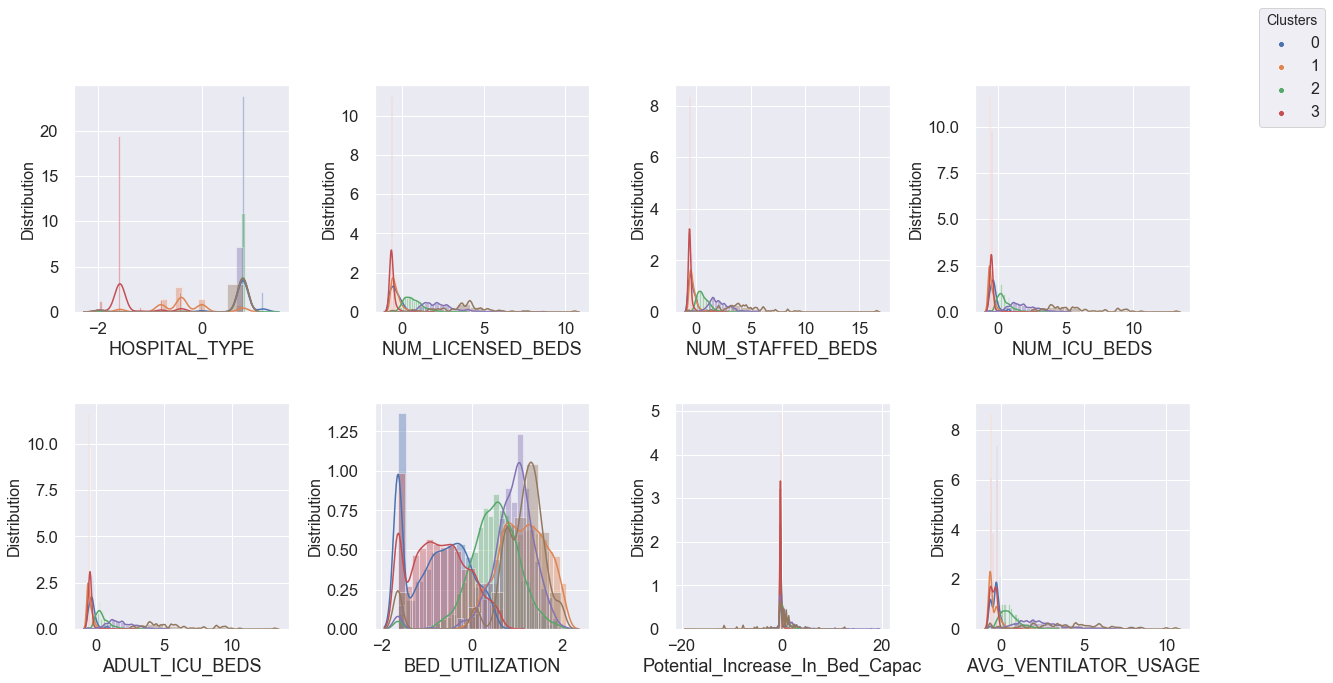

In [146]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(model3_frame.columns):
    if(col == "cluster"):
        pass
    else:
        for j in model3_frame.cluster.unique():
            ax=fig.add_subplot(2,4,i+1)
            sns.distplot(model3_frame[col].loc[model3_frame.cluster==j],label=j, ax=ax,kde_kws={'bw': 0.1})
            plt.ylabel('Distribution', fontsize=16)
            
            

handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()
fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1,fontsize=16,
                    title="Clusters",title_fontsize=14)

#plt.tight_layout()
plt.savefig("cluster_distribution_model3.png")

In [ ]:
#Distribution Plot for BED_UTILIZATION
col = 'BED_UTILIZATION'
ylabel = "Count"
ax = df.hist(by='HOSPITAL_TYPE',column=col,figsize=(20,13))
plt.tight_layout()

ax[0][0].set_xlabel(col)
ax[0][1].set_xlabel(col)
ax[0][2].set_xlabel(col)
ax[1][0].set_xlabel(col)
ax[1][1].set_xlabel(col)
ax[1][2].set_xlabel(col)
ax[2][0].set_xlabel(col)
ax[2][1].set_xlabel(col)
ax[2][2].set_xlabel(col)

ax[0][0].set_ylabel(ylabel)
ax[0][1].set_ylabel(ylabel)
ax[0][2].set_ylabel(ylabel)
ax[1][0].set_ylabel(ylabel)
ax[1][1].set_ylabel(ylabel)
ax[1][2].set_ylabel(ylabel)
ax[2][0].set_ylabel(ylabel)
ax[2][1].set_ylabel(ylabel)
ax[2][2].set_ylabel(ylabel)
plt.tight_layout()

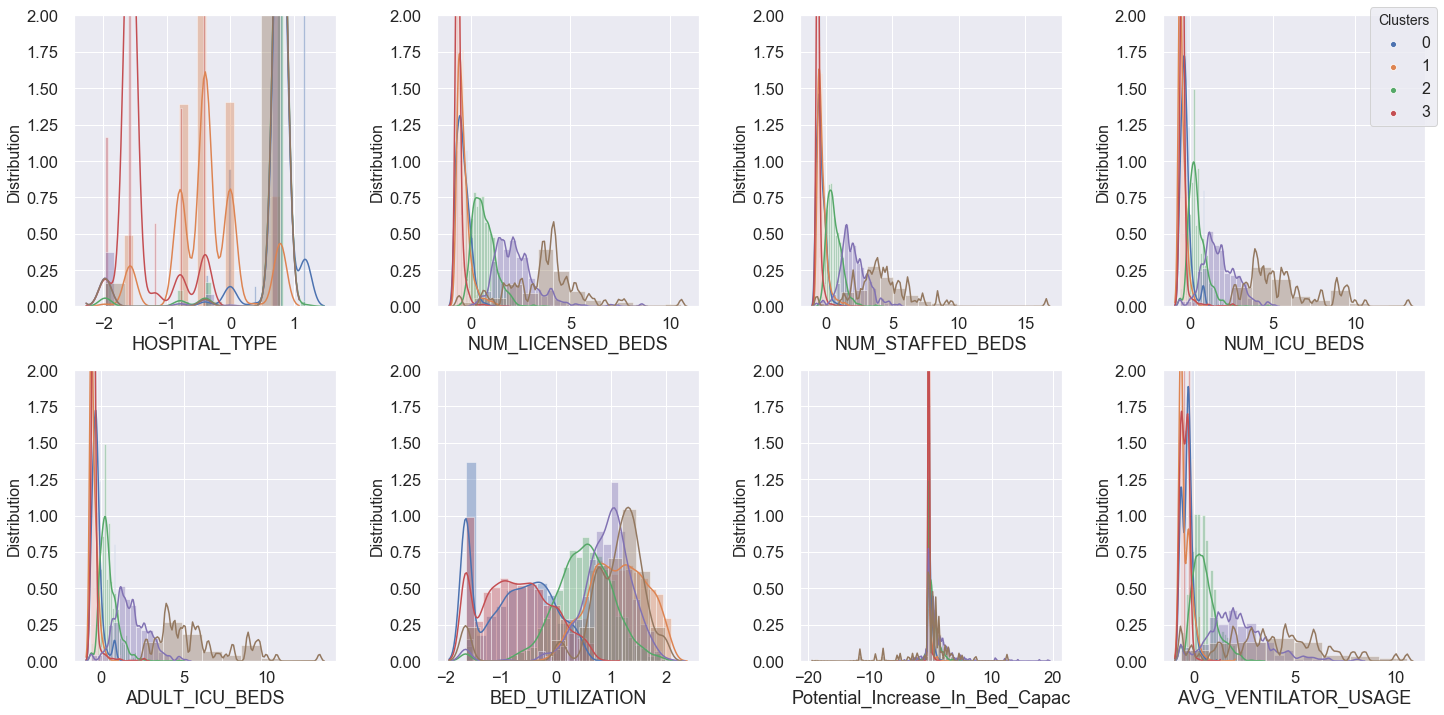

In [145]:
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, col in enumerate(model3_frame.columns):
    if(col == "cluster"):
        pass
    else:
        for j in model3_frame.cluster.unique():
            ax=fig.add_subplot(2,4,i+1)
            ax.set(ylim=(0, 2))
            sns.distplot(model3_frame[col].loc[model3_frame.cluster==j],label=j, ax=ax,kde_kws={'bw': 0.1})
            plt.ylabel('Distribution', fontsize=16)
           

handles = pairplot._legend_data.values()
labels = pairplot._legend_data.keys()
fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1,fontsize=16,
                    title="Clusters",title_fontsize=14)


plt.tight_layout()
plt.savefig("cluster_distribution_model3_zoom.png")

1. Licensed Beds: Cluster 1 and 5 are normally distributed, while 0,4 and 2 are right skewed, 3- left skewed
2. Staffed Beds: Cluster 1,5 and 3 are normally distributed while 0,4 and 2 are right skewed
3. ICU Beds: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
4. Adult_ICU:Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
5. Bed Utilization: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
6. Avg Ventilaton Usage: Cluster 1 and 3 are normally distributed while 0 and 2 are right skewed
7. Hospital Type: 

1. Normal - 1,3,5
2. Skewed - 0,2,4
3. Overlapping: All the clusters have overlapping areas with other clusters
4. Clusters 0 and 2 have large overlapping areas
5. Bed Utilization feature has very high overlapping areas

---------------------------

### Patient Route Analysis

In [103]:
import pandas as pd
data = pd.read_csv("PatientRoute.csv")
data.head()

,patient_id,global_num,date,location,latitude,longitude
0,1000000001,2.0,22/01/2020,Gyeonggi-do_Gimpo-si,37.615246,126.715632
1,1000000001,2.0,24/01/2020,Seoul_Jung-gu,37.567241,127.005659
2,1000000002,5.0,25/01/2020,Seoul_Seongbuk-gu,37.592560,127.017048
3,1000000002,5.0,26/01/2020,Seoul_Seongbuk-gu,37.591810,127.016822
4,1000000002,5.0,26/01/2020,Seoul_Seongdong-gu,37.563992,127.029534


In [104]:
data[data.location=='Daegu_Buk-gu'].shape

(45, 6)

In [105]:
data.head()

transactions2 = data.groupby(['patient_id'])['location'].apply(list)
print(transactions2.head(5))

patient_id
1000000001                [Gyeonggi-do_Gimpo-si, Seoul_Jung-gu]
1000000002    [Seoul_Seongbuk-gu, Seoul_Seongbuk-gu, Seoul_S...
1000000003                   [Seoul_Jongno-gu, Seoul_Jongno-gu]
1000000004                                  [Seoul_Jungnang-gu]
1000000005                                  [Seoul_Jungnang-gu]
Name: location, dtype: object


In [106]:
from apyori import apriori as ap

In [107]:
# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions2)
results = list(ap(transaction_list, min_support=0.002,min_confidence=0.2,min_lift=3,min_length=2))

# print first 5 rules
print(results[:5])

def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

[RelationRecord(items=frozenset({'Busan_Dongnae-gu', 'Busan_Buk-gu'}), support=0.0033030553261767133, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Busan_Buk-gu'}), items_add=frozenset({'Busan_Dongnae-gu'}), confidence=0.4, lift=11.533333333333335)]), RelationRecord(items=frozenset({'Busan_Gangseo-gu', 'Busan_Buk-gu'}), support=0.0033030553261767133, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Busan_Buk-gu'}), items_add=frozenset({'Busan_Gangseo-gu'}), confidence=0.4, lift=44.03636363636364), OrderedStatistic(items_base=frozenset({'Busan_Gangseo-gu'}), items_add=frozenset({'Busan_Buk-gu'}), confidence=0.3636363636363636, lift=44.03636363636363)]), RelationRecord(items=frozenset({'Busan_Yeonje-gu', 'Busan_Buk-gu'}), support=0.005780346820809248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Busan_Buk-gu'}), items_add=frozenset({'Busan_Yeonje-gu'}), confidence=0.7, lift=11.612328767123287)]), RelationRecord(items=frozenset({'Busan_Busanjin-gu',

In [108]:
result_df = convert_apriori_results_to_pandas_df(results)

result_df.head(10)

,Left_side,Right_side,Support,Confidence,Lift
0,Busan_Buk-gu,Busan_Dongnae-gu,0.003303,0.400000,11.533333
1,Busan_Buk-gu,Busan_Gangseo-gu,0.003303,0.400000,44.036364
2,Busan_Gangseo-gu,Busan_Buk-gu,0.003303,0.363636,44.036364
3,Busan_Buk-gu,Busan_Yeonje-gu,0.005780,0.700000,11.612329
4,Busan_Busanjin-gu,Busan_Dongnae-gu,0.005780,0.333333,9.611111
5,Busan_Geumjeong-gu,Busan_Busanjin-gu,0.002477,0.272727,15.727273
6,Busan_Busanjin-gu,Busan_Yeonje-gu,0.010735,0.619048,10.269406
7,Busan_Dong-gu,Busan_Dongnae-gu,0.002477,0.214286,6.178571
8,Busan_Dong-gu,Busan_Haeundae-gu,0.002477,0.214286,8.109375
9,Busan_Dong-gu,Busan_Jung-gu,0.002477,0.214286,32.437500


In [109]:
result_df = result_df.sort_values(by='Lift', ascending=False)
result_df.head()

,Left_side,Right_side,Support,Confidence,Lift
362,"Seoul_Jung-gu,Daegu_Nam-gu","Daegu_Buk-gu,Daegu_Seo-gu,Daegu_Jung-gu",0.002477,1.0,403.666667
371,"Daegu_Nam-gu,Seoul_Jung-gu,Daegu_Jung-gu","Daegu_Buk-gu,Daegu_Seo-gu",0.002477,1.0,403.666667
325,"Daegu_Buk-gu,Daegu_Seo-gu","Seoul_Jung-gu,Daegu_Nam-gu",0.002477,1.0,403.666667
356,"Daegu_Buk-gu,Daegu_Seo-gu","Daegu_Nam-gu,Seoul_Jung-gu,Daegu_Jung-gu",0.002477,1.0,403.666667
357,"Daegu_Buk-gu,Seoul_Jung-gu","Daegu_Nam-gu,Daegu_Seo-gu,Daegu_Jung-gu",0.002477,1.0,403.666667


In [110]:
result_df[(result_df['Left_side'] == 'Daegu_Buk-gu') | (result_df['Right_side'] == 'Daegu_Buk-gu')]

,Left_side,Right_side,Support,Confidence,Lift
206,"Daegu_Seo-gu,Seoul_Jung-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
202,"Seoul_Jung-gu,Daegu_Nam-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
378,"Daegu_Nam-gu,Daegu_Seo-gu,Seoul_Jung-gu,Daegu_...",Daegu_Buk-gu,0.002477,1.000000,31.051282
312,"Daegu_Nam-gu,Seoul_Jung-gu,Daegu_Jung-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
303,"Daegu_Nam-gu,Daegu_Seo-gu,Daegu_Jung-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
322,"Daegu_Seo-gu,Seoul_Jung-gu,Daegu_Jung-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
333,"Daegu_Seo-gu,Seoul_Jung-gu,Daegu_Nam-gu",Daegu_Buk-gu,0.002477,1.000000,31.051282
199,"Daegu_Seo-gu,Daegu_Nam-gu",Daegu_Buk-gu,0.002477,0.750000,23.288462
193,"Daegu_Seo-gu,Daegu_Jung-gu",Daegu_Buk-gu,0.002477,0.600000,18.630769
190,"Daegu_Nam-gu,Daegu_Jung-gu",Daegu_Buk-gu,0.004129,0.555556,17.250712
